# Exploratory Data Analysis (EDA) of nutritions found in Indian foods
## Introduction
This markdown explores the nutritional composition found in indian foods. `indian-food-nutrition`dataset is used for the analysis in it. This markdown can be summarized as below:
- Statistical summary for each nutrition
- Histogram for each nutrition
- Correlation among the nutritions
 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Install kaleido for saving figure as images
!pip install kaleido==0.2.1

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# For plotting
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

#To display tables in nice formatting
from IPython.display import display_html

#To make figures appear in the downloaded 
from IPython.display import Image


pio.renderers.default = "iframe"
FIG_WIDTH = 900

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.1 MB/s eta 0:00:00


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

CSV_PATH="../input/indian-food-nutrition"
IND_FOOD_DATA_PATH=os.path.join(CSV_PATH,"Indian_Food_Nutrition_Processed.csv")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv(IND_FOOD_DATA_PATH)
display_html(df.head())

,Dish Name,Calories (kcal),Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Folate (µg)
0,Hot tea (Garam Chai),16.14,2.58,0.39,0.53,2.58,0.00,3.12,14.20,0.02,0.50,1.80
1,Instant coffee,23.16,3.65,0.64,0.75,3.62,0.00,4.92,20.87,0.06,1.51,5.60
2,Espreso coffee,51.54,6.62,1.75,2.14,6.53,0.00,13.98,58.10,0.15,1.51,5.53
3,Iced tea,10.34,2.70,0.03,0.01,2.70,0.00,0.23,1.18,0.02,5.95,1.28
4,Raw mango drink (Aam panna),35.92,9.05,0.16,0.03,7.49,0.61,79.82,7.08,0.14,45.30,14.05


## Dataset summaries 
The dataset contains the following nutritions
- Calories
- Carbohydrate
- Protein
- Fat
- Free Sugar
- Fibre
- Sodium
- Calcium
- Iron
- Vitamin C
- Folate

The unit of nutrition ranges from `g` to `ug`.

In [3]:
df.describe()

,Calories (kcal),Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Folate (µg)
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,932.000000,932.000000
mean,233.735897,18.354004,4.753008,16.267584,8.824832,1.962485,481.076755,59.877091,1.136953,14.985172,41.920000
std,187.599467,16.745936,3.442746,20.452322,12.378324,2.771622,1750.646423,67.441463,1.520863,26.619886,54.147515
min,6.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.180000,5.582500,2.100000,4.030000,1.152500,0.590000,41.910000,18.237500,0.460000,1.257500,11.955000
50%,174.920000,11.925000,3.990000,9.095000,2.780000,1.325000,101.290000,40.680000,0.830000,5.400000,24.770000
75%,315.845000,26.870000,6.602500,17.085000,11.822500,2.347500,196.605000,79.385000,1.290000,18.222500,49.100000
max,839.330000,86.530000,21.550000,90.450000,85.570000,35.710000,14174.590000,631.820000,20.570000,382.640000,550.520000


## Nutritions histograms

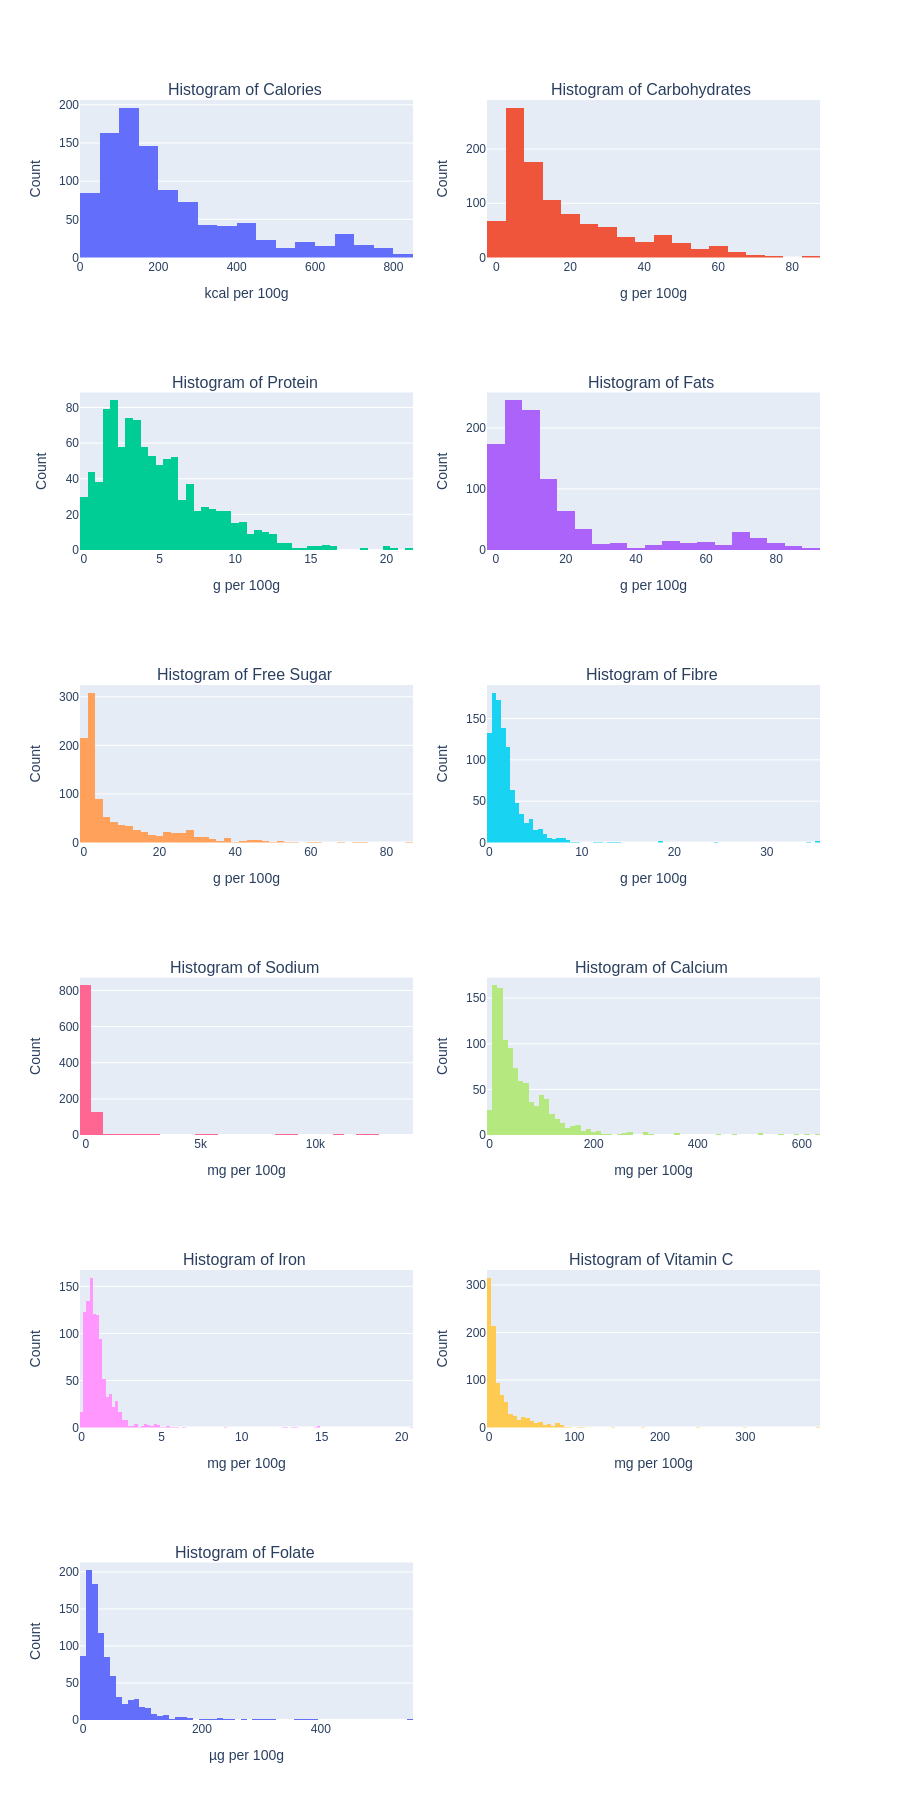

In [4]:


def get_unit(column_name)->str:
    """Return unit"""
    return column_name.split('(')[-1].split(')')[0]

def get_title(column_name)->str:
    """Return title"""
    return column_name.split('(')[0]

columns = [col for col in df.columns if col != 'Dish Name']


fig = make_subplots(rows=6, cols=2, subplot_titles=[f"Histogram of {col.split('(')[0]}" for col in columns])
row = 1
col = 1
for column_name in columns:
    fig.add_trace(
    go.Histogram(x=df[column_name], name=column_name),
    row=row, col=col
    )
    fig.update_xaxes(title_text=f"{get_unit(column_name)} per 100g", row=row, col=col)
    fig.update_yaxes(title_text="Count", row=row, col=col)
    col += 1
    if col > 2:
        col = 1
        row += 1
fig.update_layout(height=1800, width=FIG_WIDTH, title="", showlegend=False)
# To show plots in the downloaded notebook
fig.write_image("histogram_plots.png")
Image(filename="histogram_plots.png")

## Correlation of nutrients


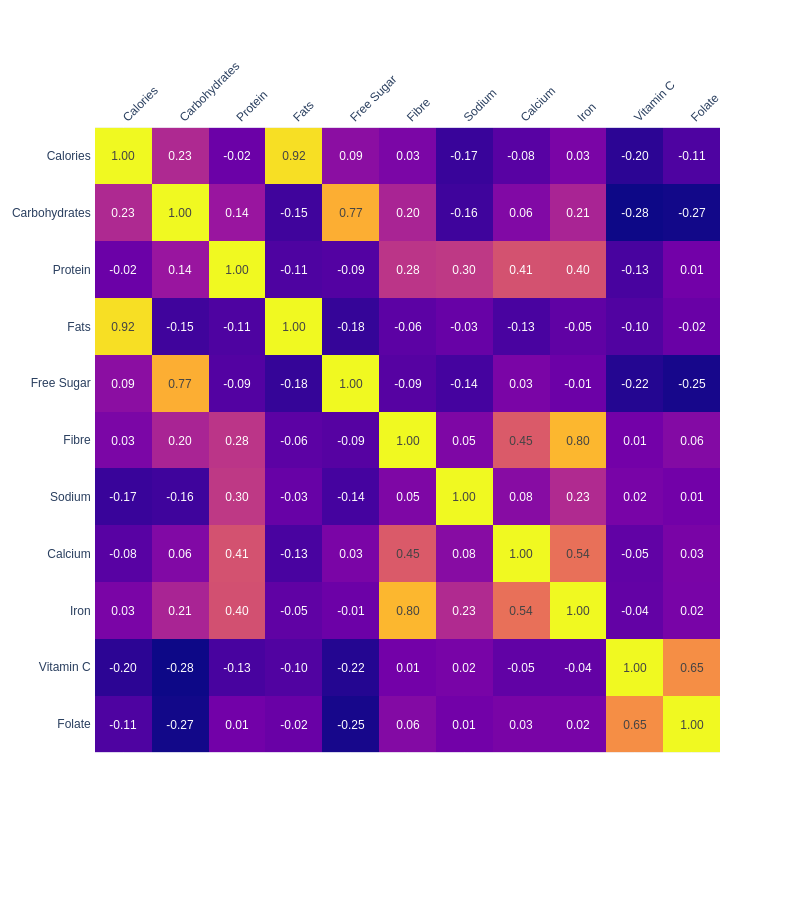

In [5]:
import plotly.express as px
df_correlation_mat = df[columns].corr().to_numpy()
labels = [col.split('(')[0] for col in columns ]
fig = px.imshow(df_correlation_mat,
                x=labels,
                y=labels,
               text_auto=False)
fig.update_traces(showscale=False, 
                  text=[[f"{v:.2f}" for v in row] for row in df_correlation_mat],
                  texttemplate="%{text}")

fig.update_layout(coloraxis_showscale=False, width=800, height=900)
fig.update_xaxes(side='top', tickangle=-45)

# To show plots in the downloaded notebook
fig.write_image("correlation_map.png")
Image(filename="correlation_map.png")

The following conclusions can be made from the correlation map
* Carbohydrates has high positive correlation with Free suger (0.77) which is as expected
* Fibre has high correlation with Iron (0.7) which indicates that food with high iron is rich in fibre as well
* Folate has high correlation with Vitamin C

## Top contributers for each nutrient

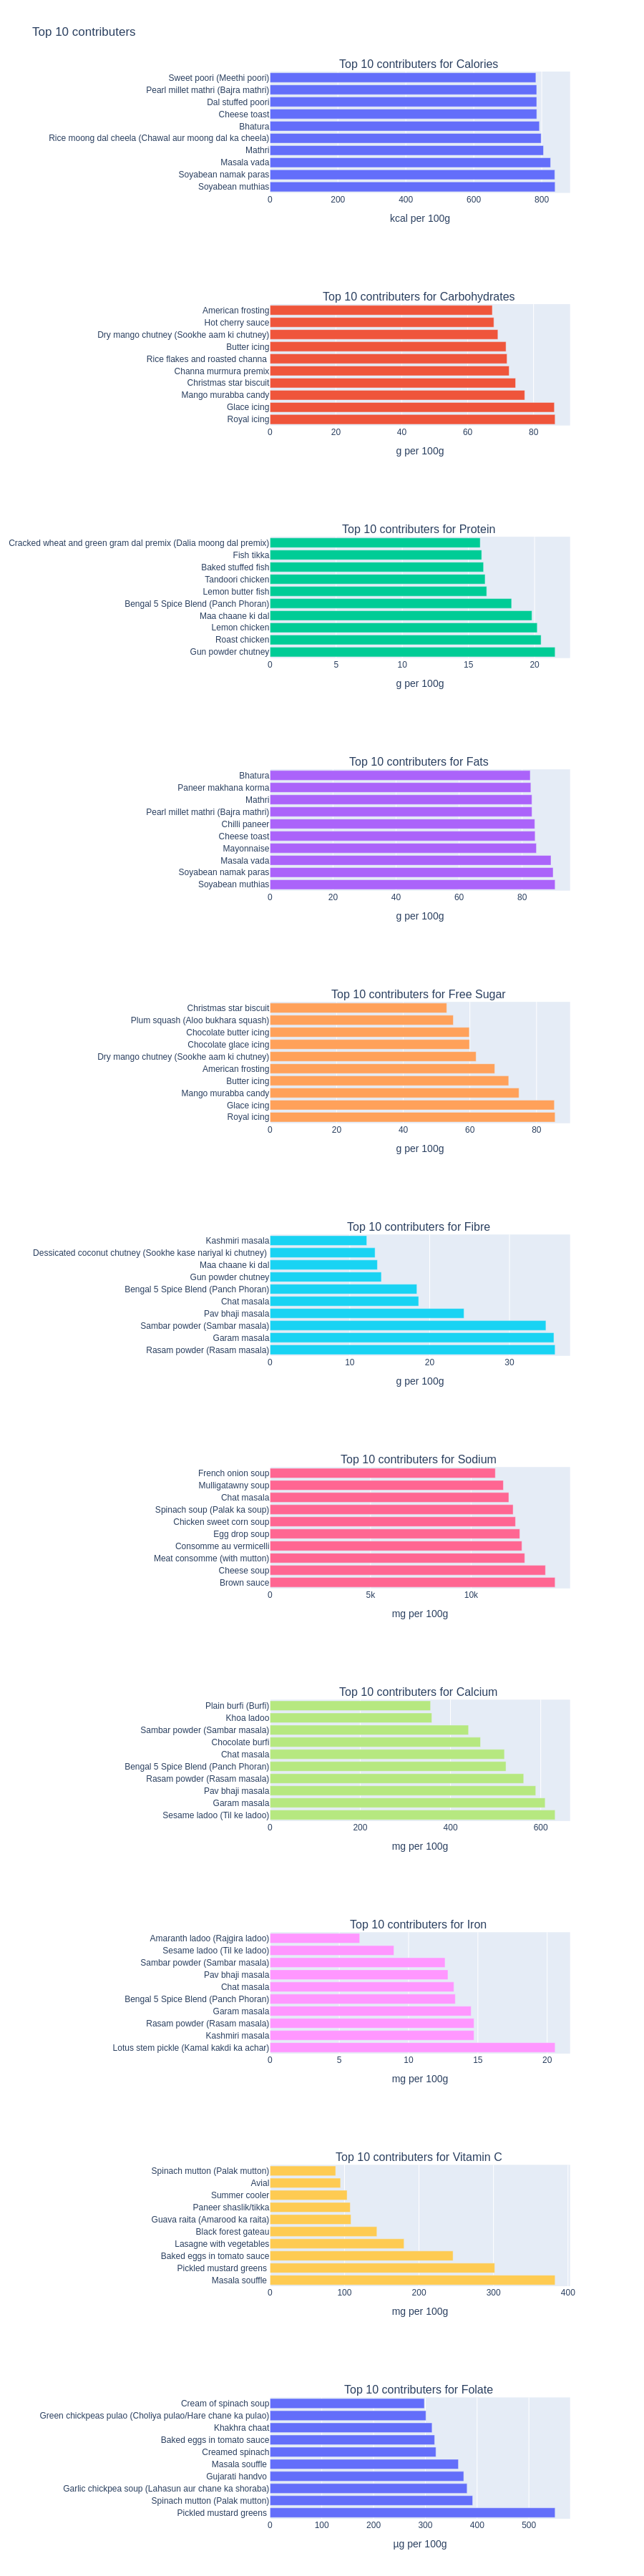

In [6]:
NUM_MEMBERS=10


bar_specs = [[{'type':'xy','l':0.05, 'r':0.05}] for i in range(len(columns))]
fig = make_subplots(rows=len(columns), cols=1, 
                    specs=bar_specs, 
                    subplot_titles=[f"Top {NUM_MEMBERS} contributers for {col.split('(')[0]}" for col in columns])
row = 1
col = 1
for column_name in columns:
    
    top_contributers = df.nlargest(NUM_MEMBERS, column_name)
    fig.add_trace(
    go.Bar(x=top_contributers[column_name], y=top_contributers['Dish Name'], orientation='h'),
    row=row, col=col)
    fig.update_xaxes(title_text=f"{get_unit(column_name)} per 100g", row=row, col=col)
    row += 1
fig.update_layout(height=3600, width=900, title=f"Top {NUM_MEMBERS} contributers", showlegend=False)
# To show plots in the downloaded notebook
fig.write_image("contributers.png")
Image(filename="contributers.png")




## Summary
This markdown analysed the nutritional components found in indian food by showing the distribution of each nutritions and also correlation between them.